<a href="https://colab.research.google.com/github/st3082group10/Abalone_Age_Prediction/blob/main/Abalone_Regularization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving abalone1.csv to abalone1 (5).csv
Ridge Regression Training RMSE: 2.213276649710744
Ridge Regression Testing RMSE: 2.1778624098589927
Ridge Regression R-squared: 0.5861364720304477
Ridge Regression MAPE: 15.69948713841993
Ridge Regression Correlation: 0.7717048458295339
Lasso Regression Training RMSE: 3.1824066787882836
Lasso Regression Testing RMSE: 3.385715085501245
Lasso Regression R-squared: -0.00022359389616033454
Lasso Regression MAPE: 28.188512266655774
Lasso Regression Correlation: 7.540898961184122e-17
Elastic-Net Regression Training RMSE: 3.1824066787882836
Elastic-Net Regression Testing RMSE: 3.385715085501245
Elastic-Net Regression R-squared: -0.00022359389616033454
Elastic-Net Regression MAPE: 28.188512266655774
Elastic-Net Regression Correlation: 7.540898961184122e-17


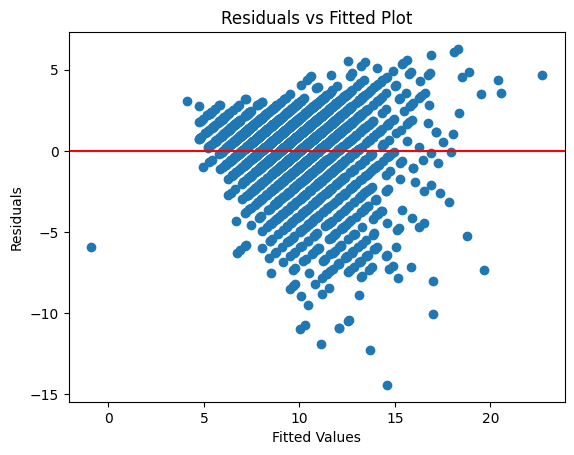

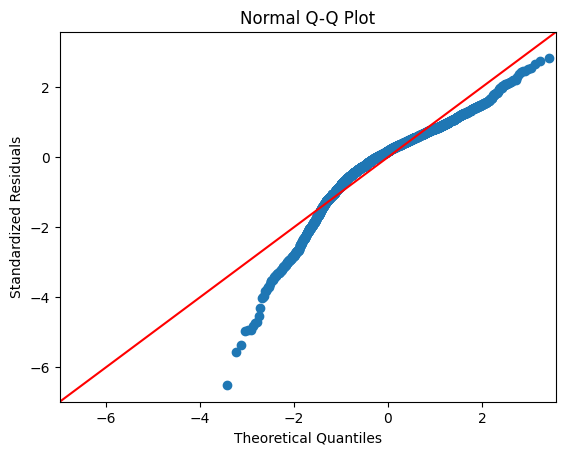

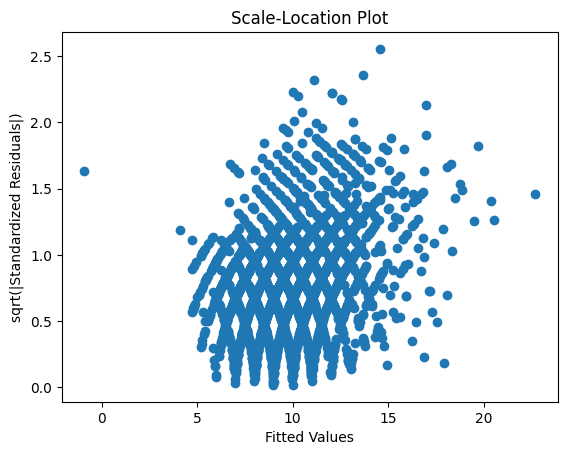

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
 

from google.colab import files
uploaded = files.upload()
import io
 
data = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))
data.head()

#Remove rows where height is equal to zero
data = data[(data['Height']>0) & (data['Height']<1)]

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing sets
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the "Rings" variable using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0,1))
y_train_scaled = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.to_numpy().reshape(-1, 1)).flatten()

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train_scaled)
y_train_pred_scaled1 = ridge.predict(X_train).flatten()
y_train_pred1 = scaler.inverse_transform(y_train_pred_scaled1.reshape(-1, 1)).flatten()
y_pred_scaled1 = ridge.predict(X_test).flatten()
y_pred1 = scaler.inverse_transform(y_pred_scaled1.reshape(-1, 1)).flatten()
train_mse1 = mean_squared_error(y_train, y_train_pred1)
train_rmse1 = np.sqrt(train_mse1)
test_mse1 = mean_squared_error(y_test, y_pred1)
test_rmse1 = np.sqrt(test_mse1)
r21 = r2_score(y_test, y_pred1)
mape1 = np.mean(np.abs((y_test - y_pred1) / y_test)) * 100
ridge_corr = np.corrcoef(y_pred1, y_test)[0, 1] # calculate correlation
print("Ridge Regression Training RMSE:", train_rmse1)
print("Ridge Regression Testing RMSE:", test_rmse1)
print("Ridge Regression R-squared:", r21)
print("Ridge Regression MAPE:", mape1)
print("Ridge Regression Correlation:", ridge_corr)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train_scaled)
y_train_pred_scaled2 = lasso.predict(X_train).flatten()
y_train_pred2 = scaler.inverse_transform(y_train_pred_scaled2.reshape(-1, 1)).flatten()
y_pred_scaled2 = lasso.predict(X_test).flatten()
y_pred2 = scaler.inverse_transform(y_pred_scaled2.reshape(-1, 1)).flatten()
train_mse2 = mean_squared_error(y_train, y_train_pred2)
train_rmse2 = np.sqrt(train_mse2)
test_mse2 = mean_squared_error(y_test, y_pred2)
test_rmse2 = np.sqrt(test_mse2)
r22 = r2_score(y_test, y_pred2)
mape2 = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
lasso_corr = np.corrcoef(y_pred2, y_test)[0, 1] # calculate correlation
print("Lasso Regression Training RMSE:", train_rmse2)
print("Lasso Regression Testing RMSE:", test_rmse2)
print("Lasso Regression R-squared:", r22)
print("Lasso Regression MAPE:", mape2)
print("Lasso Regression Correlation:",lasso_corr)

# Elastic-net Regression
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
enet.fit(X_train, y_train_scaled)
y_train_pred_scaled3 = enet.predict(X_train).flatten()
y_train_pred3 = scaler.inverse_transform(y_train_pred_scaled3.reshape(-1, 1)).flatten()
y_pred_scaled3 = enet.predict(X_test).flatten()
y_pred3 = scaler.inverse_transform(y_pred_scaled3.reshape(-1, 1)).flatten()
train_mse3 = mean_squared_error(y_train, y_train_pred3)
train_rmse3 = np.sqrt(train_mse3)
test_mse3 = mean_squared_error(y_test, y_pred3)
test_rmse3 = np.sqrt(test_mse3)
r23 = r2_score(y_test, y_pred3)
mape3 = np.mean(np.abs((y_test - y_pred3) / y_test)) * 100
enet_corr = np.corrcoef(y_pred3, y_test)[0, 1] # calculate correlation
print("Elastic-Net Regression Training RMSE:", train_rmse3)
print("Elastic-Net Regression Testing RMSE:", test_rmse3)
print("Elastic-Net Regression R-squared:", r23)
print("Elastic-Net Regression MAPE:", mape3)
print("Elastic-Net Regression Correlation:",enet_corr)

##Checking ridge regression asusmptions
# Residuals vs Fitted Plot
residuals = y_train_pred1 - y_train
fitted_values = y_train_pred1
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.show()

# Normal Q-Q Plot
residuals_standardized = (residuals - np.mean(residuals)) / np.std(residuals)
sm.qqplot(residuals_standardized, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Normal Q-Q Plot')
plt.show()

# Scale-Location Plot
sqrt_abs_standardized_residuals = np.sqrt(np.abs(residuals_standardized))
plt.scatter(fitted_values, sqrt_abs_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('sqrt(|Standardized Residuals|)')
plt.title('Scale-Location Plot')
plt.show()

